<a href="https://colab.research.google.com/github/gurleenk01/python/blob/main/ProjectNYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NYC Fare prediction

Problem Statement: Predict the fare of the Taxi using the given dataset.

It is a regression problem because the output variable is of a continuous nature.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [6]:

#@title DATA UNDERSTANDING AND VISUALIZATION

In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.shape

(50000, 8)

In [11]:
df.drop(['unique_id'],axis=1)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [12]:
# Things to do
## check outliers and remove them from longitude and latitude 
## make differenct columns from date time pickup i.e. year month date day of week hour and drop datetimeofpickup
## outliers in  amount
##eda


In [13]:
df.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


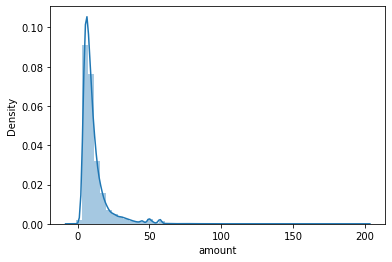

In [14]:
sns.distplot(df['amount'])

(array([7.7100e+03, 3.3592e+04, 5.3000e+03, 1.6900e+03, 7.0400e+02,
        5.6400e+02, 3.5400e+02, 3.3000e+01, 2.2000e+01, 1.3000e+01,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ -5.  ,   5.25,  15.5 ,  25.75,  36.  ,  46.25,  56.5 ,  66.75,
         77.  ,  87.25,  97.5 , 107.75, 118.  , 128.25, 138.5 , 148.75,
        159.  , 169.25, 179.5 , 189.75, 200.  ]),
 <a list of 20 Patch objects>)

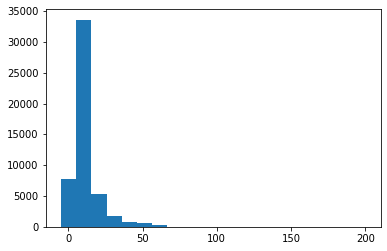

In [15]:
plt.hist(df['amount'],bins=20)

To do
1.   Remove negative and zero values from amount
2.   Remove outliers in longitude and latitude



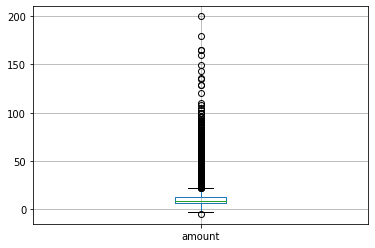

In [16]:
df.boxplot('amount')

In [17]:
df['amount'].min()
     

-5.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


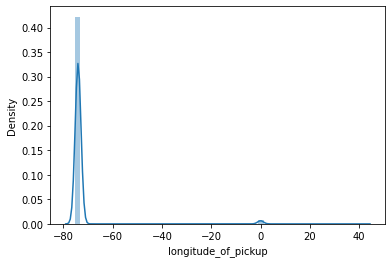

In [18]:
sns.distplot(df['longitude_of_pickup'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


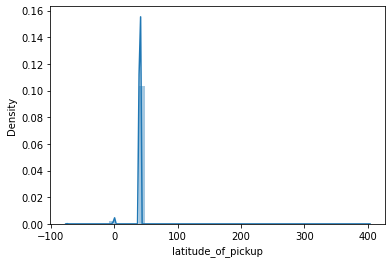

In [19]:
sns.distplot(df['latitude_of_pickup'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


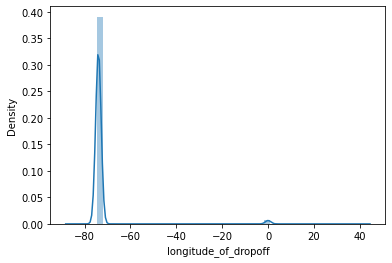

In [20]:
sns.distplot(df['longitude_of_dropoff'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


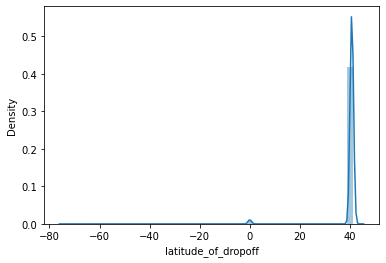

In [21]:
sns.distplot(df['latitude_of_dropoff'])

In [22]:
import warnings
warnings.simplefilter('ignore')

In [23]:
# The city of New York longitude ranges between -75 and -72. The latitude ranges between 40 and 42. So,

In [24]:
def clean_data(df):
    new_df = df[
        ((df['amount'] > 0) & (df['amount'] <= 200)) &
        ((df['longitude_of_pickup'] > -75) & (df['longitude_of_pickup'] < -73)) & 
        ((df['latitude_of_pickup'] > 40) & (df['latitude_of_pickup'] < 42)) &
        ((df['longitude_of_dropoff'] > -75) & (df['longitude_of_dropoff'] < -73)) & 
        ((df['latitude_of_dropoff'] > 40) & (df['latitude_of_dropoff'] < 42))&
        ((df['no_of_passenger'] > 0) & (df['no_of_passenger'] <= 6)) ] 
    return new_df

In [25]:
df = clean_data(df)

In [26]:
len(df)

48785

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48785 non-null  object 
 1   amount                48785 non-null  float64
 2   date_time_of_pickup   48785 non-null  object 
 3   longitude_of_pickup   48785 non-null  float64
 4   latitude_of_pickup    48785 non-null  float64
 5   longitude_of_dropoff  48785 non-null  float64
 6   latitude_of_dropoff   48785 non-null  float64
 7   no_of_passenger       48785 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ MB


In [28]:
df['date_time_of_pickup'] = pd.to_datetime(df["date_time_of_pickup"])


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             48785 non-null  object             
 1   amount                48785 non-null  float64            
 2   date_time_of_pickup   48785 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   48785 non-null  float64            
 4   latitude_of_pickup    48785 non-null  float64            
 5   longitude_of_dropoff  48785 non-null  float64            
 6   latitude_of_dropoff   48785 non-null  float64            
 7   no_of_passenger       48785 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.3+ MB


In [30]:
df['year'] = df['date_time_of_pickup'].dt.year
df['month'] = df['date_time_of_pickup'].dt.month
df['date'] = df['date_time_of_pickup'].dt.day
df['day'] = df['date_time_of_pickup'].dt.dayofweek
df['hours'] = df['date_time_of_pickup'].dt.hour

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             48785 non-null  object             
 1   amount                48785 non-null  float64            
 2   date_time_of_pickup   48785 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   48785 non-null  float64            
 4   latitude_of_pickup    48785 non-null  float64            
 5   longitude_of_dropoff  48785 non-null  float64            
 6   latitude_of_dropoff   48785 non-null  float64            
 7   no_of_passenger       48785 non-null  int64              
 8   year                  48785 non-null  int64              
 9   month                 48785 non-null  int64              
 10  date                  48785 non-null  int64              
 11  day                   48785 non-null  int64              
 12  hour

In [32]:
df.drop(columns=['unique_id','date_time_of_pickup'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                48785 non-null  float64
 1   longitude_of_pickup   48785 non-null  float64
 2   latitude_of_pickup    48785 non-null  float64
 3   longitude_of_dropoff  48785 non-null  float64
 4   latitude_of_dropoff   48785 non-null  float64
 5   no_of_passenger       48785 non-null  int64  
 6   year                  48785 non-null  int64  
 7   month                 48785 non-null  int64  
 8   date                  48785 non-null  int64  
 9   day                   48785 non-null  int64  
 10  hours                 48785 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 4.5 MB


In [34]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,date,day,hours
count,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000
mean,11.366096,-73.975174,40.751132,-73.974029,40.751588,1.674798,2011.740105,6.277155,15.663257,3.030706,13.482587
std,9.661005,0.039407,0.030835,0.038291,0.033566,1.288841,1.867988,3.461294,8.659906,1.956804,6.504498
min,0.010000,-74.711648,40.121653,-74.755480,40.164927,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992308,40.736522,-73.991333,40.735917,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.982122,40.753450,-73.980492,40.754127,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.968381,40.767781,-73.965336,40.768482,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,200.000000,-73.137393,41.650000,-73.137393,41.543217,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


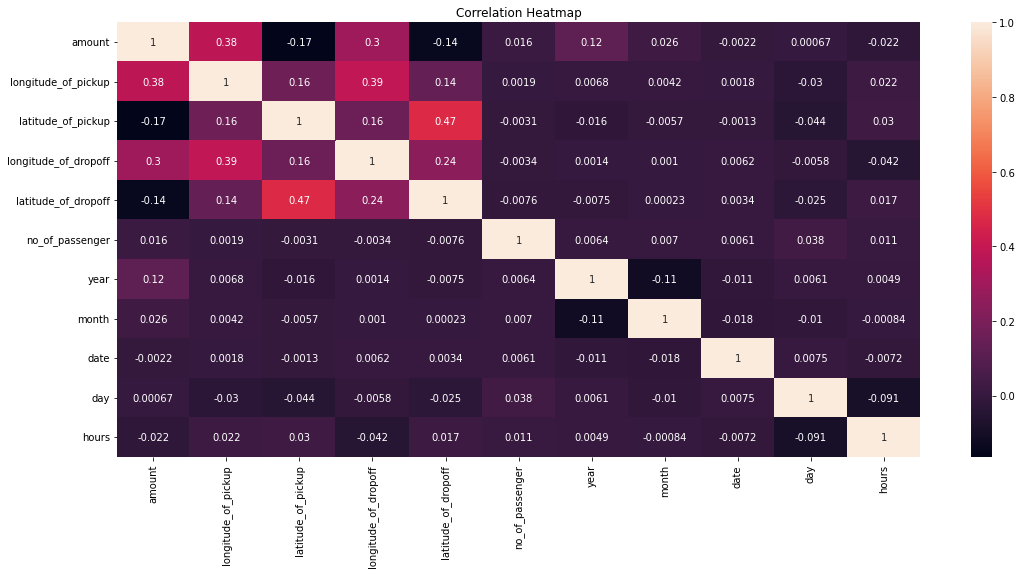

In [35]:
plt.figure(figsize = (18,8))
plt.title('Correlation Heatmap')
corr = df.corr()
corr
sns.heatmap(corr, annot = True)

Text(0.5, 1.0, 'Histogram of no of Passengers')

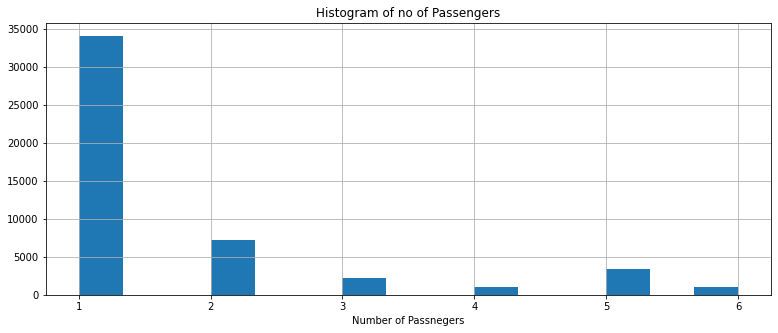

In [36]:
df.no_of_passenger.hist(bins = 15,figsize=(13,5))
plt.xlabel('Number of Passnegers')
plt.title('Histogram of no of Passengers')


Text(0.5, 1.0, 'Histogram of Amount')

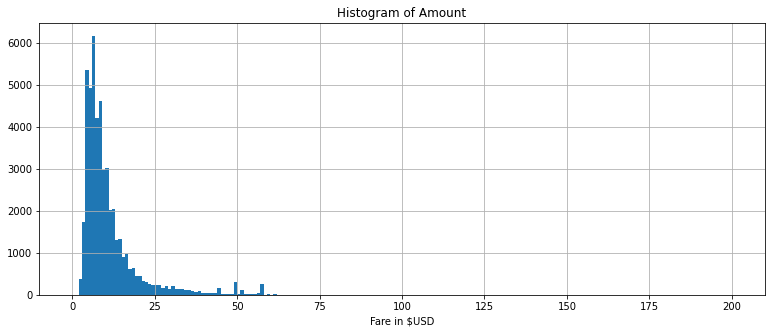

In [37]:
df.amount.hist(bins = 200,figsize = (13,5))
plt.xlabel('Fare in $USD')
plt.title('Histogram of Amount')

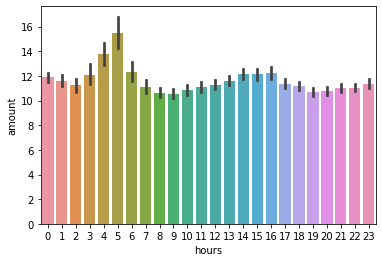

In [38]:
sns.barplot(x=df['hours'],y=df['amount'])

Model training


In [39]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,date,day,hours
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [40]:
import math
import sklearn

In [41]:
#Function to get distance in kilomerters using pickup and dropoff longitudes and latitudes using haversine formula
def haversine(lat1, lon1, lat2, lon2):
    
  # convert decimal degrees to radians 
  lon1=np.deg2rad(lon1.to_numpy())
  lat1=np.deg2rad(lat1.to_numpy())
  lon2=np.deg2rad(lon2.to_numpy())
  lat2=np.deg2rad(lat2.to_numpy())

  # haversine formula 
  dlon = lon2 - lon1 
  dlat = lat2 - lat1 
  a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
  c = 2 * np.arcsin(np.sqrt(a)) 
  r = 6372.8 # Radius of earth in kilometers
  return np.around(c * r, decimals=2)

In [42]:
#Adding 'distance_travelled' column extracted using haversine function
df['distance_travelled'] = haversine(df['latitude_of_pickup'],df['longitude_of_pickup'],\
                                            df['latitude_of_dropoff'],df['longitude_of_dropoff'])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
X, y = df.drop('amount', axis = 1), df['amount']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=1)

Linear regression


In [45]:
model1=LinearRegression()
##fit with train data
model1.fit(X_train,y_train)

LinearRegression()

In [46]:
model1.score(X_train,y_train)

0.6668582066183522

In [47]:
model1.score(X_test,y_test)

0.5729298614427725

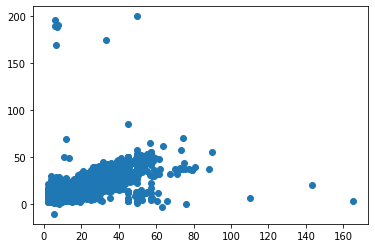

In [48]:
predictions=model1.predict(X_test)
plt.scatter(y_test,predictions)

In [49]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(y_test,predictions)

2.525679021063259

In [51]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

6.09588302292943

LINEAR REGRESSION WITH STANDARDIZATION

In [52]:
scaler = StandardScaler()

In [53]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [54]:
scaler.mean_

array([-7.39752364e+01,  4.07509537e+01, -7.39740852e+01,  4.07515036e+01,
        1.66851152e+00,  2.01173926e+03,  6.27681631e+00,  1.56567689e+01,
        3.03563794e+00,  1.34971156e+01,  3.37750798e+00])

In [55]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [56]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [57]:
np.round(X_train.describe(),1)

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,date,day,hours,distance_travelled
count,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0
mean,-74.0,40.8,-74.0,40.8,1.7,2011.7,6.3,15.7,3.0,13.5,3.4
std,0.0,0.0,0.0,0.0,1.3,1.9,3.5,8.7,2.0,6.5,3.9
min,-74.7,40.1,-74.8,40.2,1.0,2009.0,1.0,1.0,0.0,0.0,0.0
25%,-74.0,40.7,-74.0,40.7,1.0,2010.0,3.0,8.0,1.0,9.0,1.3
50%,-74.0,40.8,-74.0,40.8,1.0,2012.0,6.0,16.0,3.0,14.0,2.2
75%,-74.0,40.8,-74.0,40.8,2.0,2013.0,9.0,23.0,5.0,19.0,4.0
max,-73.1,41.5,-73.1,41.5,6.0,2015.0,12.0,31.0,6.0,23.0,101.1


In [58]:
np.round(X_train_scaled.describe(),1)

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,date,day,hours,distance_travelled
count,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0,34149.0
mean,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-19.0,-20.7,-20.8,-17.5,-0.5,-1.5,-1.5,-1.7,-1.6,-2.1,-0.9
25%,-0.4,-0.5,-0.5,-0.5,-0.5,-0.9,-0.9,-0.9,-1.0,-0.7,-0.5
50%,-0.2,0.1,-0.2,0.1,-0.5,0.1,-0.1,0.0,-0.0,0.1,-0.3
75%,0.2,0.6,0.2,0.5,0.3,0.7,0.8,0.8,1.0,0.8,0.2
max,21.6,25.5,22.3,23.6,3.4,1.7,1.7,1.8,1.5,1.5,25.3


In [59]:
model2 = LinearRegression().fit(X_train_scaled, y_train)

In [60]:
model2.score(X_train_scaled,y_train)

0.6668582066183524

In [61]:
model2.score(X_test_scaled,y_test)

0.5729298614427711

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor 

In [63]:
model3= DecisionTreeRegressor(random_state = 0,max_depth=6) 

In [64]:
model3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [65]:
model3.score(X_train,y_train)

0.8007440619767003

In [66]:
model3.score(X_test,y_test)

0.7769819362207281

In [67]:
model3.predict(X_test)

array([12.68836387,  6.35461459,  6.35461459, ...,  6.35461459,
        6.35461459, 12.68836387])

SVR

In [68]:
from sklearn.svm import SVR

In [69]:
model4=SVR(kernel='linear')

In [70]:
model4.fit(X_train,y_train)

SVR(kernel='linear')

In [71]:
model4.score(X_train,y_train)

0.5753766520293232

In [72]:
model4.score(X_test,y_test)

0.4022972445465287

SVR WITH STANDARDIZATION

In [73]:
model5=SVR().fit(X_train_scaled,y_train)

In [74]:
model5.score(X_train_scaled,y_train)

0.7622920101557092

In [75]:
model5.score(X_test_scaled,y_test)

0.7770290495951545

BAGGING REGRESSION

In [76]:
from sklearn.ensemble import BaggingRegressor

In [77]:
model6=BaggingRegressor(base_estimator=model3,n_estimators=45)

In [78]:
model6.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                      random_state=0),
                 n_estimators=45)

In [79]:
model6.score(X_train,y_train)

0.8241039443104164

In [80]:
model6.score(X_test,y_test)

0.7953922805113715

ADABOOST

In [81]:
from sklearn.ensemble import AdaBoostRegressor

In [82]:
model7 =AdaBoostRegressor(n_estimators=50)

In [83]:
model7.fit(X_train,y_train)

AdaBoostRegressor()

In [84]:
model7.score(X_train,y_train)

0.44473607777275315

In [85]:
model7.score(X_test,y_test)

0.3741548830578507

GRADIENT BOOSTING

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
model8=GradientBoostingRegressor()

In [88]:
model8.fit(X_train,y_train)

GradientBoostingRegressor()

In [89]:
model8.score(X_train,y_train)

0.8516486807365139

In [90]:
model8.score(X_test,y_test)

0.8050022663375256

RANDOM FOREST REGRESSION

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model9=RandomForestRegressor(max_features=5,n_estimators=40,max_depth=7)

In [93]:
model9.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features=5, n_estimators=40)

In [94]:

model9.score(X_train,y_train)

0.8417975977292987

In [95]:
model9.score(X_test,y_test)

0.8028747003526681

KNN REGRESSOR

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [137]:
model10=KNeighborsRegressor()

In [138]:
model10.fit(X_train,y_train)

KNeighborsRegressor()

In [139]:
model10.score(X_train,y_train)

0.8056087541642679

In [140]:
model10.score(X_test,y_test)

0.7091254109005346

TRAIN AND TEST SCORES OF ALL THE ALGORITHMS:

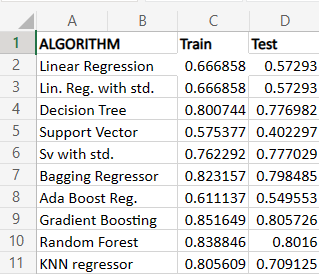